<a href="https://colab.research.google.com/github/NarenneraN/DL/blob/main/01_NN_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [8]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
X_train[0].shape

(28, 28)

4


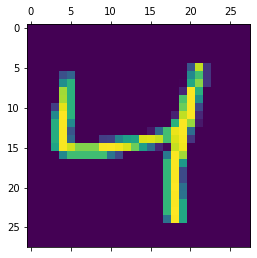

In [13]:
plt.matshow(X_train[2])
print(Y_train[2])

In [14]:
X_train.shape

(60000, 28, 28)

In [ ]:
#(28,28) -> should be one dimension

In [16]:
X_train_flatten=X_train.reshape(len(X_train),28*28)

In [17]:
X_train_flatten.shape

(60000, 784)

In [18]:
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [20]:
X_train[0].shape

(28, 28)

In [22]:
X_train_flatten[0].shape

(784,)

In [ ]:
#Input Layer -> 784 Neurons
#Output Layer -> 10 Neurons

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10,input_dim=(784),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.8333 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1447 - accuracy: 0.8784
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6358 - accuracy: 0.8839
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5527 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5043 - accuracy: 0.8859


In [ ]:
# No we can Normalize the data as our values aren't scaed here

In [30]:
X_train_flatten=X_train_flatten/255
X_test_flatten=X_test_flatten/255
# Now our accuracy improves

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10,input_dim=(784),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9260


In [32]:
 model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2668 - accuracy: 0.9260


[0.26684242486953735, 0.9259999990463257]

In [34]:
Y_predicted=model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


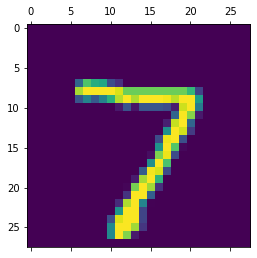

In [35]:
plt.matshow(X_test[0])

In [37]:
Y_predicted[0]

array([1.54552935e-02, 3.70583933e-07, 1.03739880e-01, 9.37618434e-01,
       2.47874763e-03, 1.12986617e-01, 1.91766912e-06, 9.99739945e-01,
       1.52798876e-01, 5.85190177e-01], dtype=float32)

In [38]:
np.argmax(Y_predicted[0])

7

In [41]:
y_pred_ans=[np.argmax(i) for i in Y_predicted]
y_pred_ans[0]

7

In [45]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_ans)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    5,   11,    2,    3,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  929,   16,    9,    3,   13,    8,   39,    3],
       [   2,    0,   22,  914,    0,   28,    2,   11,   25,    6],
       [   1,    1,    3,    1,  929,    0,   13,    2,   11,   21],
       [   8,    3,    1,   24,   10,  782,   16,    5,   37,    6],
       [   7,    3,    7,    1,    7,   10,  917,    2,    4,    0],
       [   1,    6,   26,    7,    8,    1,    0,  945,    6,   28],
       [   4,    8,    5,   16,    9,   20,   10,    9,  888,    5],
       [   8,    7,    2,   11,   39,    7,    0,   32,   14,  889]],
      dtype=int32)>

In [46]:
import seaborn as sns

Text(33.0, 0.5, 'Truth')

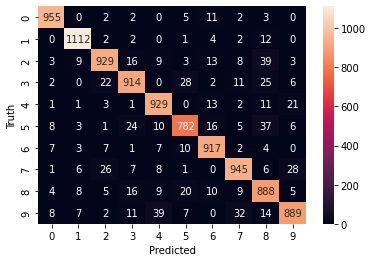

In [49]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]) 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2786 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1285 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0530 - accuracy: 0.9838


In [52]:
 model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0785 - accuracy: 0.9749


[0.07852046191692352, 0.9749000072479248]

In [55]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_dim=(784),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]) 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1854 - accuracy: 0.9449
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0740 - accuracy: 0.9769
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0252 - accuracy: 0.9913


In [56]:
 model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9832


[0.05925625562667847, 0.9832000136375427]